In a linear classifier, the equation of a line is given by

$$z = wv + b$$

If we can separate the data with a line, we can use that line to classify the sample

<img src="images/linear_classifier.svg" width="30%"/>

If we use the line to calculate the class of a point, it always returns a positive or negative number, such as 3, -2 and so on.
In order to convert these numbers into classes (0 or 1), we can apply a threshold such as

$$
\left\{\begin{matrix}
\hat{y} = 1 &\ \ \ \text{if} \hspace{15pt} z >= 0 \\ 
\hat{y} = 0 & \text{if} \hspace{15pt} z < 0
\end{matrix}\right.
$$

Thus, we can use a plot to print this information.

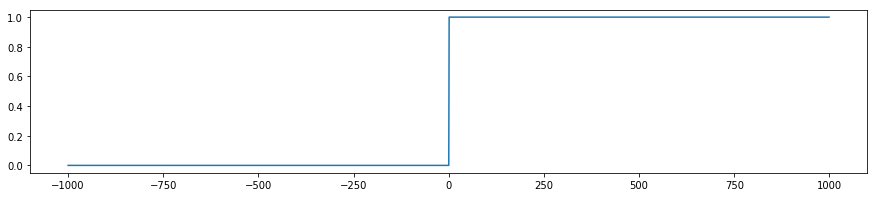

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(15,3))

x = range(-1000,1000)
y = []
for v in x:
    y.append(1 if v > 0 else 0)
plt.plot(x, y)
plt.show()

# Logistic Regression

Logistic Regression seem like a linear regression with a smooth transition. It is given by the equation

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $\sigma(z)$ with $z=-4$ is approximately zero and $\sigma(z)$ with $z=4$ is approximately one, i.e, $\sigma(-4)\approx 0$ and $\sigma(4)\approx 1$, as illustred by the plot.

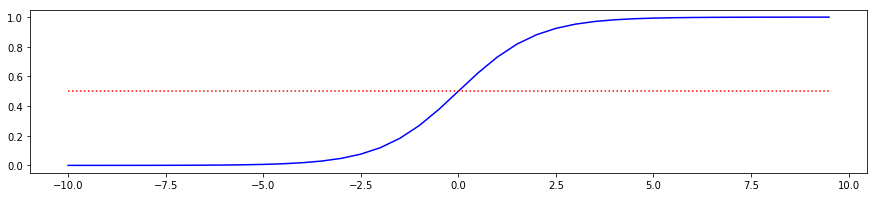

In [21]:
import numpy as np
plt.figure(figsize=(15,3))

def sigmoid(z):
    z = np.array(z)
    y = 1./(1+np.exp(-z))
    return y

x = np.arange(-10, 10, 0.5)
center = [0.5]*len(x)
y = sigmoid(x)
plt.plot(x, y, 'b')
plt.plot(x, center, ':r')
plt.show()

Logistic function can also be understood as the probability $p(y=1|x_1,w) = \sigma(wx_1 + b)$. For example, consider

$p(y=1|x_1,w) = \sigma(w^Tx_1 + b)$<br>
$z = w^Tx_1 + b$<br>
$z = [-1, 1]\begin{bmatrix}
2 \\
0 
\end{bmatrix}$<br>
$p(y=1|x_1,w) = \sigma(z)$<br>
$p(y=1|x_1,w) = \sigma(2) = 0.88$